# Introduction to Linear Regression



In [1]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries required
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import statsmodels.formula.api as smf


In [2]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", index_col=0)
house_data

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,NaN,2.59,9,3.91,0,0,0,36.2,335790.0
1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,NaN,4.10,7,3.02,0,0,0,91.7,376908.0
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,NaN,2.40,9,2.90,0,0,0,50.0,297330.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
6,"1440 N Wood St #2F, Chicago IL",Wicker Park,Condo,242500,NaN,5.38,9,3.22,0,0,0,69.4,196667.5
7,"1137 N Wood St #F2, Chicago IL",Wicker Park,Condo,477500,NaN,4.18,8,3.39,0,0,0,59.5,445030.0
8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0
9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0


In [4]:
# Summarise the data
house_data.describe()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,2.190000e+02,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,4.834311e+05,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,4.862191e+05
std,4.001249e+05,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,3.978582e+05
min,2.450000e+04,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,2.883650e+04
25%,3.190000e+05,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,3.074488e+05
50%,3.900000e+05,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,3.919800e+05
75%,5.125000e+05,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,5.324750e+05
max,3.686000e+06,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3.973508e+06


In [8]:
# Look for any linear correlations in the data - the bigger the number the better ordinary least squares will do
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A6B0F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000104B9B38>]], dtype=object)

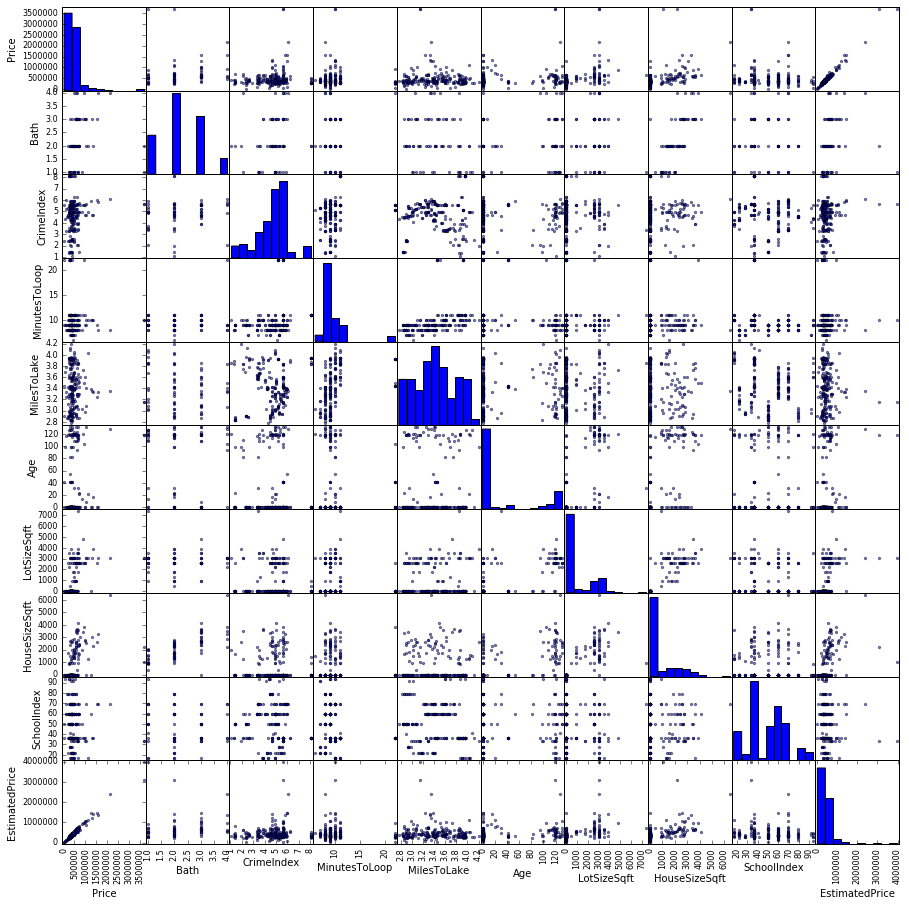

In [5]:
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [3]:
# create a dataframe with just the estimated price column in it
estimated_price = house_data.loc[:,['EstimatedPrice']]

In [4]:
# create a RANSAC regressor
ransac = sklearn.linear_model.RANSACRegressor(max_trials=100)

In [5]:
# use the RANSAC regressor to find how much of the Price is related to the EstimatedPrice
ransac.fit(house_data.loc[:,['Price']], estimated_price)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [6]:
# use that regression to predict Price based on EstimatedPrice
predictions = ransac.predict(house_data.loc[:,['Price']])

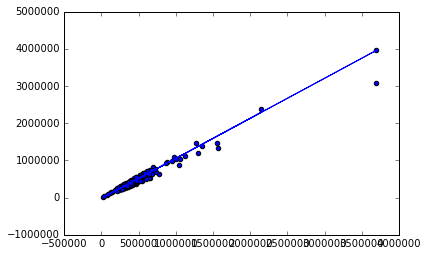

In [7]:
# draw a scatter plot of Price / EstimatedPrice and overlay the RANSAC prediction on it
plt.scatter(house_data.loc[:,['Price']], estimated_price)
plt.plot(house_data.loc[:,['Price']], predictions, color='blue')

In [8]:
# RANSAC has an attribute called 'estimator'. What type is it?
ransac.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# What is the coefficient (gradient) and y-intercept as reported by this estimator (hint: coef_ and intercept_)
ransac.estimator_.coef_


array([[ 1.07742469]])

In [10]:
ransac.estimator_.intercept_

array([-23980.40730851])

In [12]:
# Create a new data frame with two columns: HouseSizeSqft and Bath
house_with_features = house_data[house_data.Bath.notnull()]

In [14]:
features = house_with_features.loc[:,['HouseSizeSqft', 'Bath']]

In [15]:
price_fixed = house_with_features.loc[:,['Price']]

In [16]:
# Regress Price against these values
ransac.fit(features, price_fixed)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [17]:
# What would you expect a house price to be for a house with 3 bathrooms and 3500 sqft?
predicted_price = ransac.predict(features)
predicted_price

array([[  868316.59796648],
       [  501072.1557932 ],
       [  458171.22147974],
       [  400700.15853152],
       [  484883.1239768 ],
       [  680770.40895523],
       [  631877.66057884],
       [  877343.85549499],
       [  298832.54811769],
       [  643535.63577751],
       [  604681.95941815],
       [  845572.88055531],
       [  708370.83591132],
       [  682670.74790279],
       [  400700.15853152],
       [  650820.70009489],
       [  389772.56205545],
       [  687853.1103749 ],
       [  546480.51774733],
       [  739613.79502611],
       [  589909.46788569],
       [ 1461239.8882421 ],
       [  570482.62970601],
       [  979941.84463142],
       [  525074.26775187],
       [  631472.93478343],
       [  349097.61961675],
       [  286488.41135769],
       [  751676.49602019],
       [  419317.54512038],
       [  479621.68863647],
       [  431459.31898268],
       [  476788.6080686 ],
       [  303284.5318672 ],
       [  318664.11209278],
       [  573922.798

In [18]:
ransac.estimator_.intercept_

array([ 95783.48885137])

In [19]:
ransac.estimator_.coef_

array([[   202.3628977 ,  16470.46758232]])

In [20]:
# Can you find any houses in the data set which are similar to this?
house_with_features[(house_with_features.Bath == 3) & (house_with_features.HouseSizeSqft < 3500)]

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
11,"1732 W Pierce Ave, Chicago IL",Wicker Park,Multi-Family Home,314000,3.0,5.18,9,3.06,131,2614,2405,50.0,334724.0
19,"2152 W Caton St, Chicago IL",Wicker Park,Single-Family Home,885000,3.0,5.58,11,3.72,121,4792,3461,36.1,945180.0
20,"1735 N Hermitage Ave, Chicago IL",Wicker Park,Single-Family Home,982500,3.0,4.65,9,2.98,0,2614,2783,33.3,1087627.5
23,"1725 W Le Moyne St #2, Chicago IL",Wicker Park,Multi-Family Home,580000,3.0,5.18,9,3.08,108,2614,2656,50.0,596820.0
35,"2034 W Willow St #D, Chicago IL",Wicker Park,Townhome,585000,3.0,5.58,11,3.46,0,871,1983,36.1,539955.0
49,"1754 W Crystal St, Chicago IL",Wicker Park,Single-Family Home,695000,3.0,4.93,9,3.29,0,2614,2403,59.5,729750.0
57,"1744 N Wilmot Ave, Chicago IL",Wicker Park,Single-Family Home,770000,3.0,5.58,11,3.61,0,2614,2997,36.1,623700.0
85,"2046 W Willow St #C, Chicago IL",Wicker Park,Townhome,510000,3.0,5.58,11,3.48,0,871,1704,36.1,523260.0
89,"1756 N Wilmot Ave, Chicago IL",Wicker Park,Single-Family Home,1000000,3.0,5.58,11,3.61,0,2614,2739,36.1,1033000.0
130,"1435 N Elk Grove Ave, Chicago IL",Wicker Park,Single-Family Home,1550000,3.0,5.99,9,3.24,0,2614,2620,69.4,1464750.0


In [ ]:
# Try selecting different variables or combinations of variables or another regressor.


In [21]:
#3d 
import mpl_toolkits.mplot3d

In [22]:
#(Optional) Can you make a 3D plot to show whether they are effective?
fig = plt.figure()

In [23]:
ax = fig.add_subplot(111, projection='3d')

In [24]:
ax.scatter(house_with_features.HouseSizeSqft, house_with_features.Bath, predicted_price, color='red')

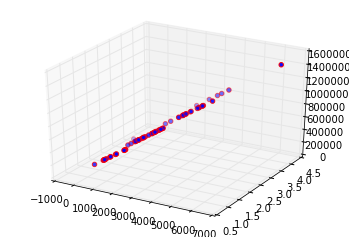

In [25]:
fig

In [26]:
house_with_features

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0
9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0
10,"1025 N Wood St, Chicago IL",Wicker Park,Multi-Family Home,303000,2.0,4.68,8,3.43,119,3049,2728,59.5,361782.0
11,"1732 W Pierce Ave, Chicago IL",Wicker Park,Multi-Family Home,314000,3.0,5.18,9,3.06,131,2614,2405,50.0,334724.0
13,"2116 W Potomac Ave, Chicago IL",Wicker Park,Multi-Family Home,650000,3.0,3.89,10,3.86,119,3485,3618,16.7,680550.0
14,"1421 N Wood St, Chicago IL",Wicker Park,Single-Family Home,490500,1.0,5.38,9,3.21,124,2614,922,69.4,516987.0
16,"1411 N Ashland Ave, Chicago IL",Wicker Park,Multi-Family Home,590000,2.0,4.50,8,2.90,118,2614,2544,78.9,589410.0


In [118]:
theil_price

NameError: name 'theil_price' is not defined